In [2]:
import JupyterImport
from FCT import *
from shortTh import *
from delay import *

importing Jupyter notebook from FCT.ipynb
importing Jupyter notebook from shortTh.ipynb
importing Jupyter notebook from delay.ipynb


### usage

under dir `/home/ovs2/lining/Gearbox/automatic`

```bash
./runall.sh tcp-general.tcl 10 0.5 Topology-incast-singlenode-unify.tcl

```
generate `tcp_[DropTail, AFQ10UlimPL, AFQ10PL, HRCCPL, AFQ100PL, AFQ1000PL]_flow_10_0.5_Topology-incast-singlenode-unify.tcl.tr`, 10 indicate the flow num, 0.5 indicate the load

```
./runall.sh tcp-general.tcl 10 Topology-incast-singlenode-unify.tcl
```
generate `tcp_[DropTail, AFQ10UlimPL, AFQ10PL, HRCCPL, AFQ100PL, AFQ1000PL]_flow_10_[0.1-0.95]_Topology-incast-singlenode-unify.tcl.tr`

```
./tcp.sh tcp-general-outinclude.tcl 10 0.5 Topology-incast-singlenode-unify.tcl AFQ10PL
```
generate file `tcp_AFQ10PL_flow_10_0.5_Topology-incast-singlenode-unify.tcl.tr` and `AFQ10PL_flow_10_0.5_Topology-incast-singlenode-unify.tcl_out.tr`

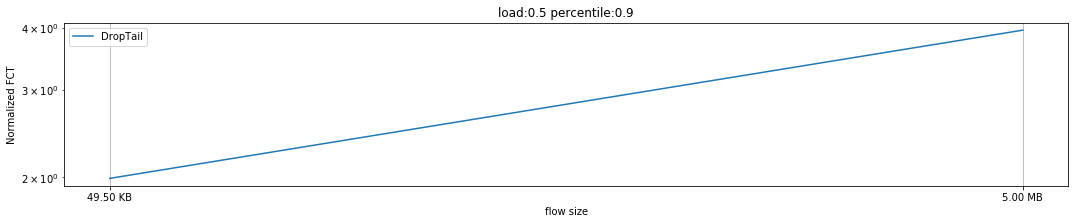

first:


,events,time,from_node,to_node,pkt_type,pkt_size,flags,src_addr,dst_addr,seq_num,pkt_id,ts
fid,,,,,,,,,,,,
4,r,1.005942,19,35,tcp,40,C--A---,20.0,35.0,0,3314,00:00:01.005942
5,r,1.005844,19,35,tcp,40,C--A---,21.0,35.1,0,2662,00:00:01.005844
6,r,1.005697,19,35,tcp,40,C--A---,22.0,35.2,0,1862,00:00:01.005697
7,r,1.005601,19,35,tcp,40,C--A---,23.0,35.3,0,1718,00:00:01.005601
10,r,1.007410,19,35,tcp,40,C--A---,20.3,35.7,0,13314,00:00:01.007410


last:


,events,time,from_node,to_node,pkt_type,pkt_size,flags,src_addr,dst_addr,seq_num,pkt_id,ts
fid,,,,,,,,,,,,
4,r,1.010547,19,35,tcp,40,------N,20.0,35.0,5292501,34226,00:00:01.010547
5,r,1.010702,19,35,tcp,1500,------N,21.0,35.1,5828321,35253,00:00:01.010702
6,r,1.010305,19,35,tcp,40,------N,22.0,35.2,6367061,32543,00:00:01.010305
7,r,1.007251,19,35,tcp,40,------N,23.0,35.3,6904341,12282,00:00:01.007251
10,r,1.007597,19,35,tcp,40,------N,20.3,35.7,74461,14550,00:00:01.007597


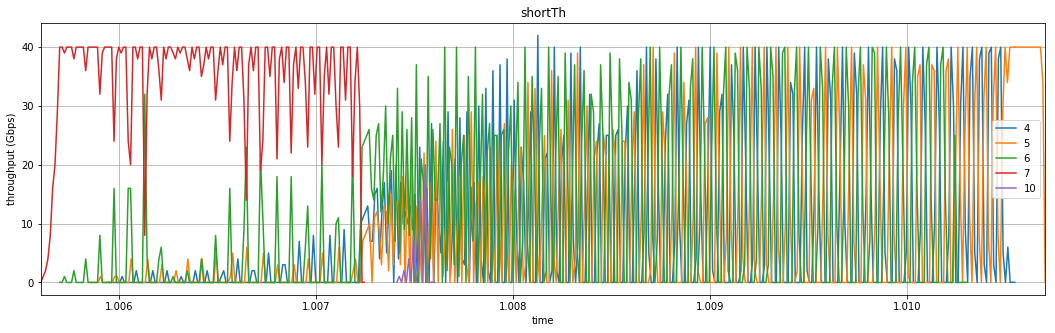

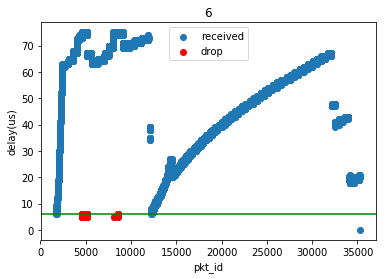

In [5]:
flow_size=[0, 6, 13, 19, 33, 53, 133, 667, 1333, 3333, 6667, 20000, float('inf')]
normalize_lists = loadNormalizeList('/home/ovs2/lining/Gearbox/automatic/flowBenchmark/', flow_size[1:-1])

FCT_analysis = FCT("/home/ovs2/lining/Gearbox/automatic/", \
                   "Topology-incast-singlenode-unify.tcl",\
                   5, \
                   [.5], \
                   ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                   normalize_lists)

FCT_analysis.plot_FCT_percentile_fix_load(\
                    ["DropTail"],\
                    .5,\
                    .9,\
                    flow_size)

df_out_tr_6 = read_out_tr("/home/ovs2/lining/Gearbox/automatic/", \
                          "DropTail_flow_5_0.5_Topology-incast-singlenode-unify.tcl_out.tr")
plot_short_th(df_out_tr_6, 12, 35)

Delay_6 = DelayAnalysis("/home/ovs2/lining/Gearbox/automatic/", \
                        'DropTail_flow_5_0.5_Topology-incast-singlenode-unify.tcl_out.tr')
Delay_6.print_pkt_delay(12, '6')

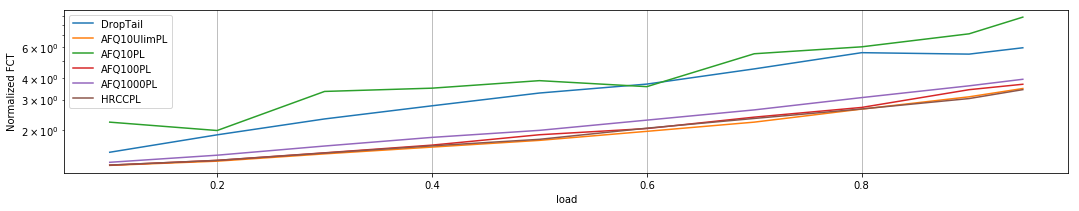

In [9]:
# plotting_mean_FCT

flow_size=[0, 6, 13, 19, 33, 53, 133, 667, 1333, 3333, 6667, 20000, float('inf')]
normalize_lists = loadNormalizeList('/home/ovs2/lining/Gearbox/automatic/flowBenchmark/', flow_size[1:-1])

FCT_analysis = FCT("/home/ovs2/lining/Gearbox/automatic/", \
                   "Topology-incast-singlenode.tcl",\
                   1000, \
                   [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], \
                   ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                   normalize_lists)
FCT_analysis.plotting_mean_FCT()

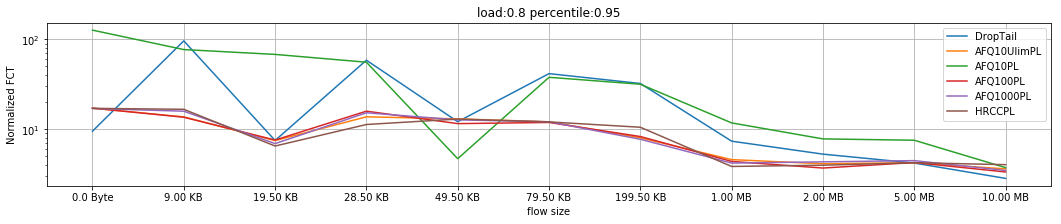

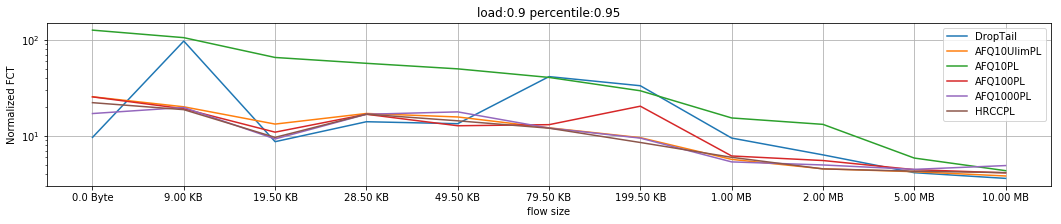

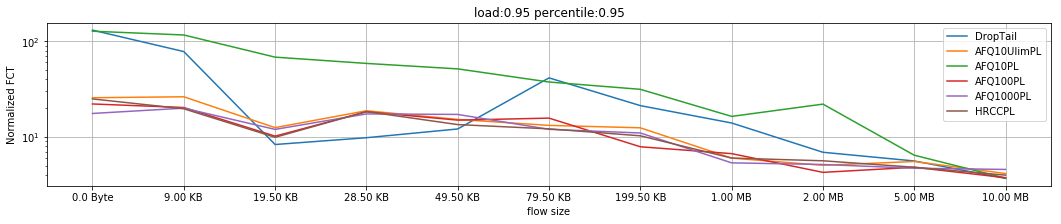

In [10]:
for load in [.8, .9, .95]:
    FCT_analysis.plot_FCT_percentile_fix_load(\
        ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
        load,\
        .95,\
        flow_size)